<a href="https://colab.research.google.com/github/Sathya-marasinghe/My_Projects/blob/main/Cat%26dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CHEST CANCER CONFIRMATION MODEL**

In [1]:
!pip install numpy -q
!pip install pandas -q
!pip install matplotlib -q
!pip install tensorflow -q
!pip install opendatasets -q

**Import Libraries**

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import opendatasets as od
import time

**Import Dataset -Chest CT-Scan Dataset**

In [ ]:
od.download("https://www.kaggle.com/datasets/samuelcortinhas/cats-and-dogs-image-classification")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sathyamarasinghe
Your Kaggle Key: ··········


100%|██████████| 64.4M/64.4M [00:00<00:00, 70.6MB/s]


In [ ]:
BATCH_SIZE = 32
IMAGE_SIZE = (128,128)

In [ ]:
train_data_dir = "/content/cats-and-dogs-image-classification/train"
test_data_dir = "/content/cats-and-dogs-image-classification/test"


In [ ]:
train_data = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                         batch_size = BATCH_SIZE,
                                                         image_size = IMAGE_SIZE ,
                                                         subset='training',
                                                         validation_split=0.1,
                                                         seed=42
                                                          )

Found 557 files belonging to 2 classes.
Using 502 files for training.


In [ ]:
test_data_dir = tf.keras.utils.image_dataset_from_directory (test_data_dir,
                                                         batch_size=BATCH_SIZE,
                                                        image_size=IMAGE_SIZE,
                                                              )


Found 140 files belonging to 2 classes.


In [ ]:
validation_data = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                              batch_size = BATCH_SIZE,
                                                              image_size = IMAGE_SIZE ,
                                                              subset='validation',
                                                               validation_split=0.1,
                                                               seed=42
                                                               )

Found 557 files belonging to 2 classes.
Using 55 files for validation.


In [ ]:
class_names = train_data.class_names
class_names

['cats', 'dogs']

In [ ]:
for image_batch,label_batch in train_data.take(1):
  print(image_batch.shape)
  print(label_batch.shape)

(32, 128, 128, 3)
(32,)


**Plot data sample**

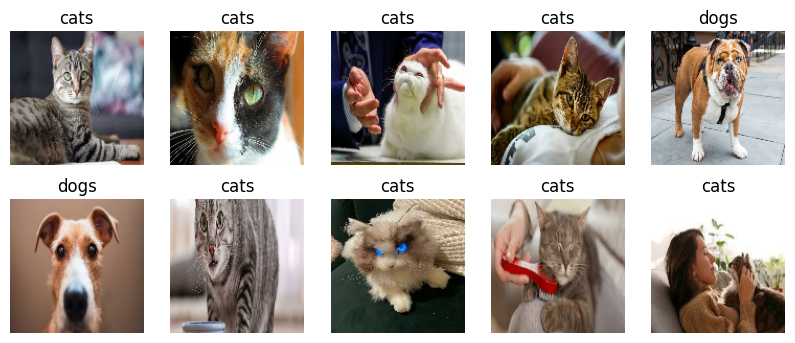

In [ ]:
plt.figure(figsize = (10,4))
for image, label in train_data.take(1):
  for i in range (10):
    ax = plt.subplot(2,5,i+1)
    plt.imshow(image[i].numpy().astype('uint8'))
    plt.title(class_names[label[i]])
    plt.axis('off')

In [ ]:
for image, label in train_data.take(1):
   for i in range (1):
    print(image)

tf.Tensor(
[[[[223.54688   231.54688   234.54688  ]
   [219.07507   227.07507   230.07507  ]
   [218.73438   226.73438   229.73438  ]
   ...
   [243.        248.        251.       ]
   [243.        248.        251.       ]
   [242.        247.        250.       ]]

  [[221.70618   229.70618   232.70618  ]
   [217.22522   225.22522   228.22522  ]
   [216.82776   224.82776   227.82776  ]
   ...
   [243.        248.        251.       ]
   [243.        248.        251.       ]
   [242.        247.        250.       ]]

  [[219.81238   227.81238   230.81238  ]
   [215.64062   223.64062   226.64062  ]
   [214.89001   222.89001   225.89001  ]
   ...
   [243.        248.        251.       ]
   [243.        248.        251.       ]
   [242.        247.        250.       ]]

  ...

  [[209.58594   208.58594   204.58594  ]
   [209.58594   208.58594   204.58594  ]
   [209.58594   208.58594   204.58594  ]
   ...
   [226.        230.        233.       ]
   [225.        229.        232.       ]
   [2

In [ ]:
train_data = train_data.map(lambda x,y : (x/255,y))
validation_data = train_data.map(lambda x,y : (x/255,y))
test_data = train_data.map(lambda x,y : (x/255,y))

In [ ]:
for image, label in train_data.take(1):
   for i in range (1):
    print(image)

tf.Tensor(
[[[[2.19607845e-01 2.74509817e-01 2.23529413e-01]
   [1.54901966e-01 2.37254903e-01 1.78431377e-01]
   [1.94163606e-01 2.49065563e-01 1.90242037e-01]
   ...
   [6.73161745e-01 5.67279398e-01 4.53553915e-01]
   [6.65257335e-01 5.47610283e-01 4.53492641e-01]
   [6.41299009e-01 5.51102936e-01 4.29534316e-01]]

  [[2.01393992e-01 2.56295949e-01 2.05315560e-01]
   [1.67386636e-01 2.49739587e-01 1.90916047e-01]
   [1.86167285e-01 2.68520206e-01 2.01853558e-01]
   ...
   [7.55055130e-01 6.33486509e-01 5.11917889e-01]
   [6.37423396e-01 5.23697913e-01 3.99708956e-01]
   [8.25873137e-01 7.31755495e-01 6.29794717e-01]]

  [[1.97549015e-01 2.60294110e-01 2.09313720e-01]
   [1.80744484e-01 2.43489578e-01 1.92509189e-01]
   [1.88480392e-01 2.51225501e-01 2.00245097e-01]
   ...
   [8.83992016e-01 8.05790424e-01 7.07720578e-01]
   [8.91314328e-01 8.04549634e-01 7.10431993e-01]
   [7.47120082e-01 6.64767146e-01 5.51041663e-01]]

  ...

  [[1.68627456e-01 2.47058824e-01 2.03921571e-01]
   [1

In [ ]:
data_augmentation = tf.keras.Sequential(
    [tf.keras.layers.RandomFlip("horizontal",input_shape=(128,128,3)),
    tf.keras.layers.RandomRotation(0.2),
      tf.keras.layers.RandomZoom(0.2),
     ]
)

**Transfer Learning**

In [ ]:
pretrained_model = tf.keras.applications.Xception(
    include_top = False,
    input_shape = (128,128,3),
    weights = "imagenet",
    pooling = max
)

83683744/83683744 [==============================] - 1s 0us/step


In [ ]:
for layer in pretrained_model.layers:
  layer.trainable = False

In [ ]:
model = tf.keras.models.Sequential()
model.add(data_augmentation)

model.add(pretrained_model)

model.add(tf.keras.layers.Conv2D(32,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(128,kernel_size=1,activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(1, 1), strides=(1, 1)))

model.add(tf.keras.layers.Conv2D(128,kernel_size=1,activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(1, 1), strides=(1, 1)))

model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())

In [ ]:
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(64,activation='relu'))

model.add(tf.keras.layers.Dense(1,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 128, 128, 3)       0         
                                                                 
 xception (Functional)       (None, 4, 4, 2048)        20861480  
                                                                 
 conv2d_4 (Conv2D)           (None, 2, 2, 32)          589856    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 1, 1, 32)         0         
 )                                                               
                                                                 
 conv2d_5 (Conv2D)           (None, 1, 1, 128)         4224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 1, 1, 128)        0         
 2D)                                                  

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['Accuracy'])

In [ ]:
tf.config.run_functions_eagerly(True)

In [ ]:
start_time = time.time()

history= model.fit(train_data,
                    epochs= 10,
                    validation_data=validation_data)

end_time = time.time()



Epoch 1/10
16/16 [==============================] - 190s 12s/step - loss: 0.5685 - Accuracy: 0.4980 - val_loss: 0.6947 - val_Accuracy: 0.4980
Epoch 2/10
16/16 [==============================] - 188s 12s/step - loss: 0.3797 - Accuracy: 0.4980 - val_loss: 0.7024 - val_Accuracy: 0.4980
Epoch 3/10
16/16 [==============================] - 178s 11s/step - loss: 0.3303 - Accuracy: 0.4980 - val_loss: 0.6939 - val_Accuracy: 0.4980
Epoch 4/10
16/16 [==============================] - 186s 12s/step - loss: 0.3208 - Accuracy: 0.4980 - val_loss: 0.7050 - val_Accuracy: 0.4980
Epoch 5/10
16/16 [==============================] - 179s 11s/step - loss: 0.3538 - Accuracy: 0.4980 - val_loss: 0.7020 - val_Accuracy: 0.4980
Epoch 6/10
16/16 [==============================] - 183s 12s/step - loss: 0.2811 - Accuracy: 0.4980 - val_loss: 0.6933 - val_Accuracy: 0.4980
Epoch 7/10
16/16 [==============================] - 187s 12s/step - loss: 0.2725 - Accuracy: 0.4980 - val_loss: 0.6954 - val_Accuracy: 0.4980
Epoch 

In [ ]:
history.history


{'loss': [0.5684842467308044,
  0.3797256648540497,
  0.33033403754234314,
  0.3208261728286743,
  0.3538137376308441,
  0.28107449412345886,
  0.27245068550109863,
  0.26798659563064575,
  0.1769419014453888,
  0.23166553676128387],
 'Accuracy': [0.49800798296928406,
  0.49800798296928406,
  0.49800798296928406,
  0.49800798296928406,
  0.49800798296928406,
  0.49800798296928406,
  0.49800798296928406,
  0.49800798296928406,
  0.49800798296928406,
  0.49800798296928406],
 'val_loss': [0.6947163939476013,
  0.7023564577102661,
  0.693906843662262,
  0.7049771547317505,
  0.7020489573478699,
  0.6933011412620544,
  0.6953645348548889,
  0.7078446745872498,
  0.6935536861419678,
  0.7260355949401855],
 'val_Accuracy': [0.49800798296928406,
  0.49800798296928406,
  0.49800798296928406,
  0.49800798296928406,
  0.49800798296928406,
  0.49800798296928406,
  0.49800798296928406,
  0.49800798296928406,
  0.49800798296928406,
  0.49800798296928406]}

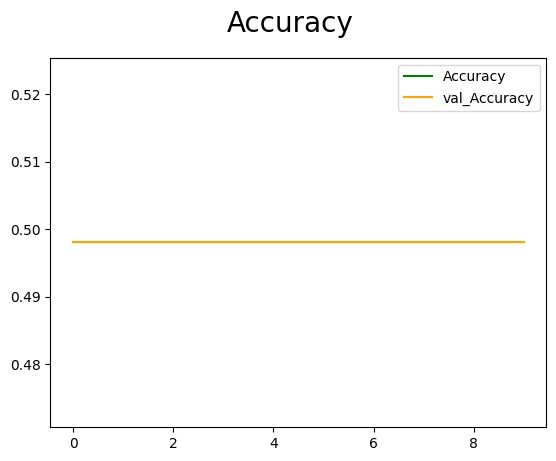

In [ ]:
fig = plt.figure()

# Check if 'accuracy' and 'val_accuracy' keys exist in history.history
if 'Accuracy' in history.history:
    plt.plot(history.history['Accuracy'], color='green', label='Accuracy')
if 'val_Accuracy' in history.history:
    plt.plot(history.history['val_Accuracy'], color='orange', label='val_Accuracy')

fig.suptitle('Accuracy', fontsize=20)
plt.legend()
plt.show()


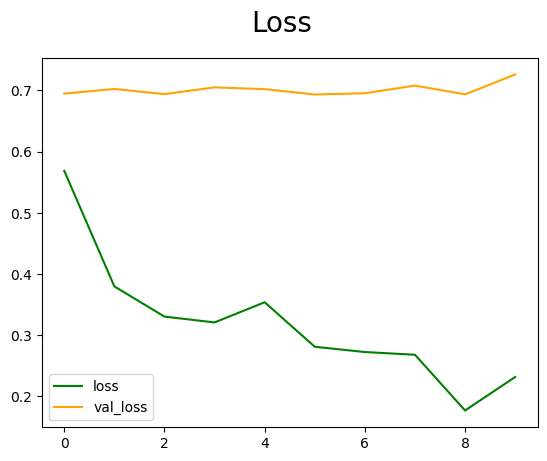

In [ ]:
fig = plt.figure()


if 'loss' in history.history:
    plt.plot(history.history['loss'], color='green', label='loss')
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], color='orange', label='val_loss')

fig.suptitle('Loss', fontsize=20)
plt.legend()
plt.show()

In [ ]:
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()
accuracy = tf.keras.metrics.CategoricalAccuracy()

In [ ]:
for batch in test_data.as_numpy_iterator():
  x,y = batch
  yhat = model.predict(x)
  precision.update_state(y,yhat)
  recall.update_state(y,yhat)
  accuracy.update_state(y,yhat)

/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


1/1 [==============================] - 2s 2s/step


In [ ]:
precision.result()
recall.result()
accuracy.result()


<tf.Tensor: shape=(), dtype=float32, numpy=0.4375>

In [3]:
!pip install opencv python
import cv2

ERROR: Could not find a version that satisfies the requirement opencv (from versions: none)
ERROR: No matching distribution found for opencv


In [4]:
image = cv2.imread('/content/cats-and-dogs-image-classification/test/dogs/dog_124.jpg')
plt.imshow(image)
plt.show()

NameError: name 'plt' is not defined

In [2]:
resized_image = tf.image.resize(image,IMAGE_SIZE)
scaled_image = resized_image/255

scaled_image = tf.reshape(scaled_image, shape=(1, 128, 128, 3))
Y_hat = model.predict(scaled_image)
Y_hat

NameError: name 'tf' is not defined

In [ ]:
class_names
if y_hat >= 0.5:
  print(class_names[1])
else:
print class_names[0]